# IMPORTING DATASET


In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
files.upload() #Api key from Kaggle personal account

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kanchonkumarbishnu","key":"918046a6413dc2228d208ec4763b8396"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir "/content/data/"

mkdir: cannot create directory ‘/content/data/’: File exists


In [ ]:
%cd "/content/data/"

/content/data


In [ ]:
!kaggle datasets download -d farazrahman/earthquake #https://www.kaggle.com/datasets/farazrahman/earthquake

Dataset URL: https://www.kaggle.com/datasets/farazrahman/earthquake
License(s): CC0-1.0
  0% 0.00/492k [00:00<?, ?B/s]
100% 492k/492k [00:00<00:00, 71.5MB/s]


In [10]:
!unzip "/content/data/earthquake.zip"

Archive:  /content/data/earthquake.zip
replace all_month.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
!rm "/content/data/earthquake.zip"

In [12]:
df=pd.read_csv("/content/data/all_month.csv")

In [13]:
df.dropna(inplace=True)


In [14]:
df.shape

(6259, 22)

In [15]:
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
8012,2024-11-04T02:46:08.620Z,61.314167,-152.258667,-2.410,-0.40,ml,8.0,146.0,0.06994,0.13,...,2024-11-05T00:08:25.030Z,"66 km WNW of Beluga, Alaska",earthquake,0.35,1.450,0.285079,8.0,reviewed,av,av
8013,2024-11-04T02:44:29.870Z,61.317500,-152.261667,-3.120,-0.66,ml,5.0,208.0,0.07332,0.19,...,2024-11-04T23:58:57.340Z,"66 km WNW of Beluga, Alaska",earthquake,0.91,2.690,0.235581,5.0,reviewed,av,av
8014,2024-11-04T02:43:57.770Z,61.311000,-152.258000,-2.380,-0.21,ml,9.0,144.0,0.06752,0.12,...,2024-11-04T23:47:19.590Z,"65 km WNW of Beluga, Alaska",earthquake,0.40,1.540,0.193201,9.0,reviewed,av,av
8015,2024-11-04T02:39:10.750Z,61.315500,-152.285500,1.710,0.13,ml,10.0,124.0,0.07040,0.14,...,2024-11-04T23:41:58.070Z,"67 km WNW of Beluga, Alaska",earthquake,0.30,0.880,0.220786,10.0,reviewed,av,av
8016,2024-11-04T02:37:43.337Z,36.687800,70.135300,213.093,4.20,mb,52.0,225.0,1.65900,0.88,...,2024-12-03T23:49:42.040Z,"27 km ENE of Farkhār, Afghanistan",earthquake,11.25,8.084,0.094000,32.0,reviewed,us,us


In [16]:
df = df[df['mag'] > 0]

In [17]:
earthquake_df = df[df['type'] == 'earthquake']
print('Earthquakedataset'+str(earthquake_df.shape))
Quarryblast_df = df[df['type'] == 'quarry blast']
print('Quarry'+str(Quarryblast_df.shape))
Explosion_df=df[df['type']=='explosion']
print('Explosion'+str(Explosion_df.shape))

Earthquakedataset(5598, 22)
Quarry(85, 22)
Explosion(28, 22)


In [18]:
earthquake_df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

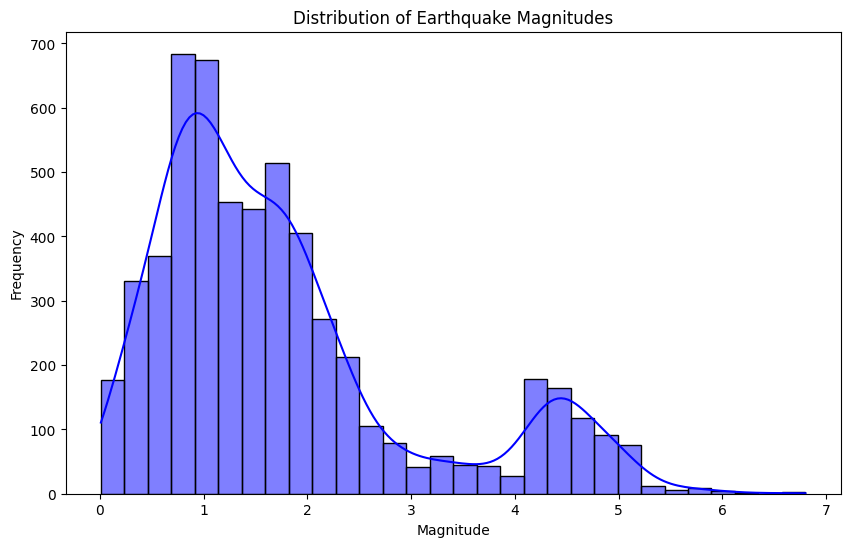

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_df['mag'], kde=True, bins=30, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

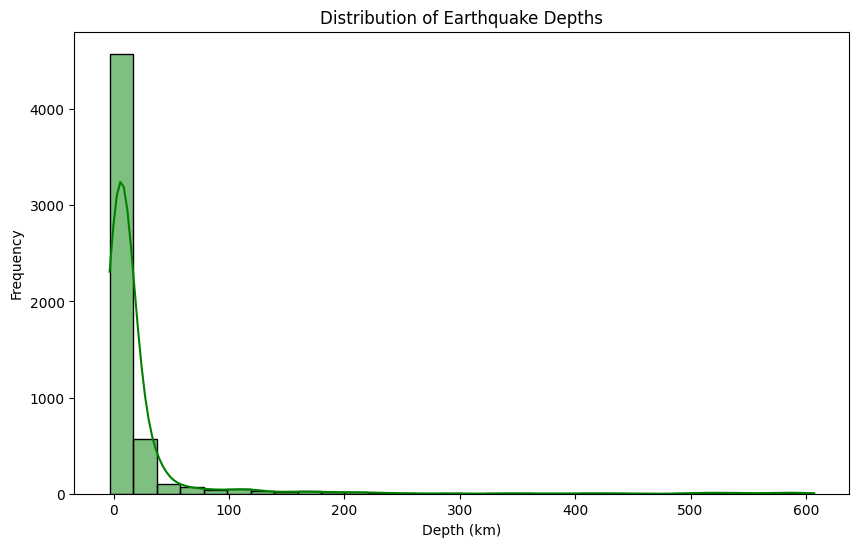

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_df['depth'], kde=True, bins=30, color='green')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

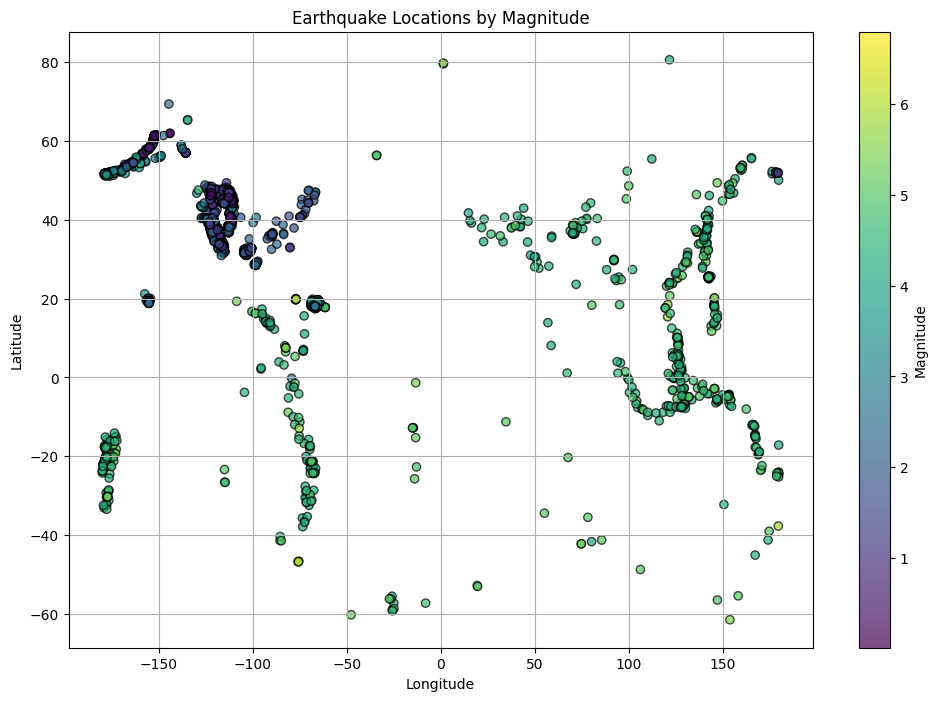

In [22]:
plt.figure(figsize=(12, 8))
plt.scatter(earthquake_df['longitude'], earthquake_df['latitude'], c=earthquake_df['mag'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Magnitude')
plt.title('Earthquake Locations by Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [23]:
!pip install basemap

In [24]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 29.7 MB/s eta 0:00:00


In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


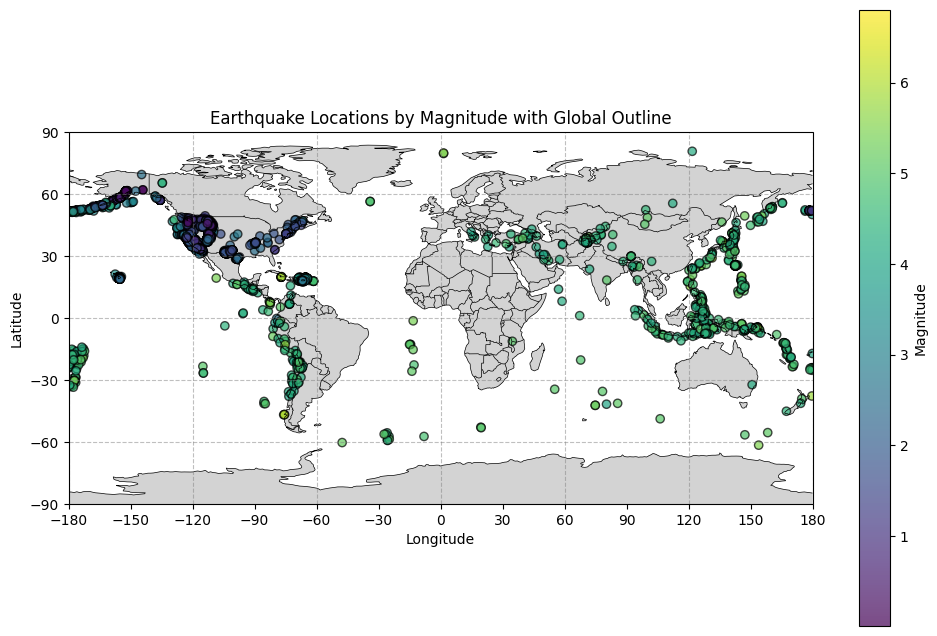

In [26]:
# Create a global map with Cartopy
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features for global outline
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Scatter plot of earthquake locations
scatter = ax.scatter(
    earthquake_df['longitude'],
    earthquake_df['latitude'],
    c=earthquake_df['mag'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Set longitude and latitude ticks manually with positive and negative values
ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=10)  # Adjust tick label size for better readability

# Add gridlines without labels
ax.gridlines(draw_labels=False, color='gray', alpha=0.5, linestyle='--')

# Add colorbar and labels
plt.colorbar(scatter, label='Magnitude', orientation='vertical', pad=0.05)
plt.title('Earthquake Locations by Magnitude with Global Outline')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

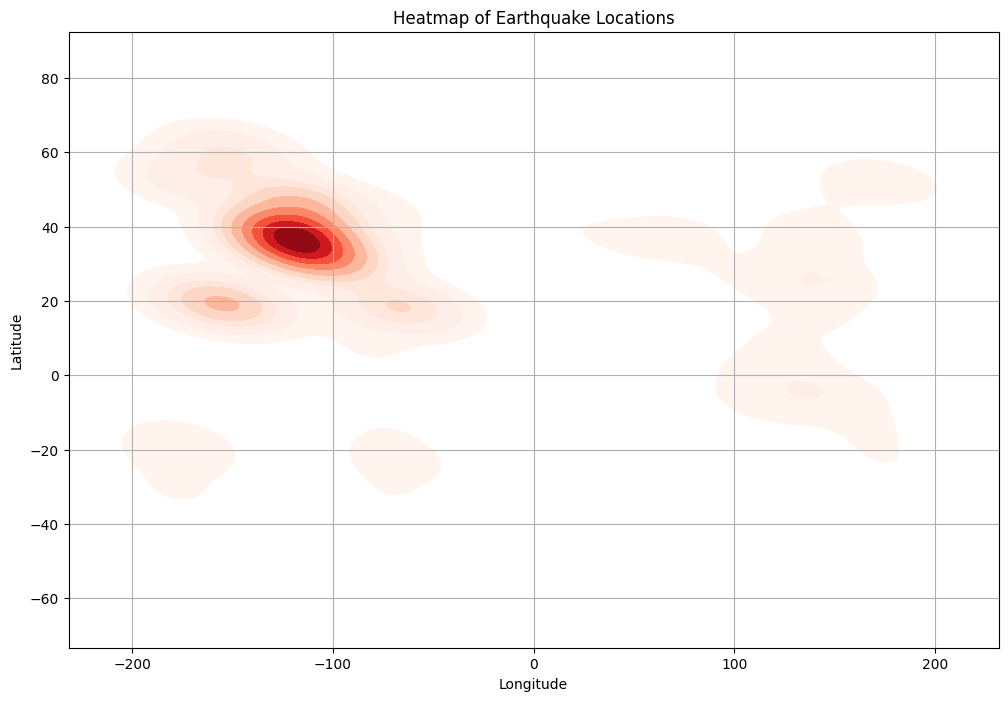

In [27]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=earthquake_df['longitude'], y=earthquake_df['latitude'], cmap='Reds', fill=True)
plt.title('Heatmap of Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

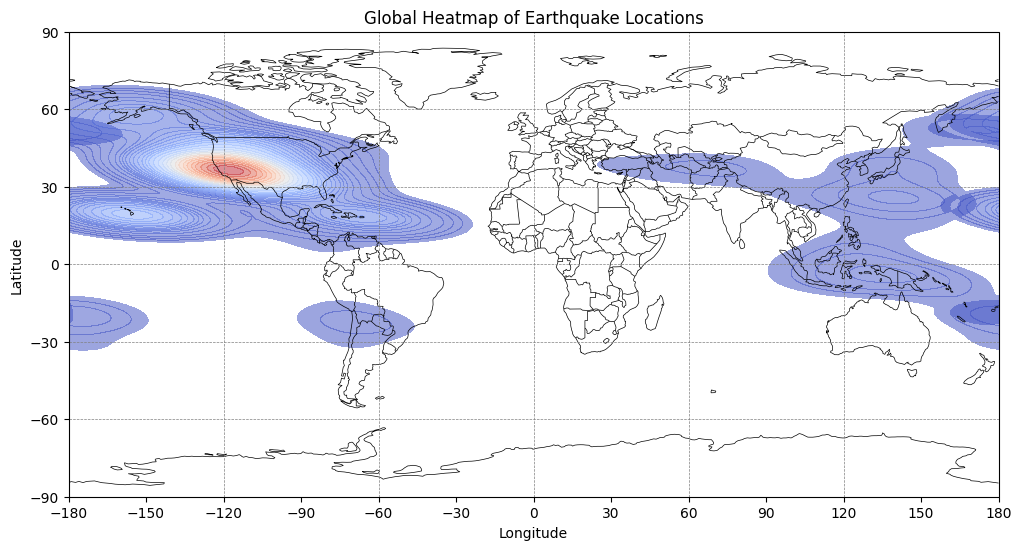

In [31]:
# Create a figure with Cartopy
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add global outline features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Plot the heatmap using seaborn with an updated colormap
sns.kdeplot(
    x=earthquake_df['longitude'],
    y=earthquake_df['latitude'],
    cmap='coolwarm',  # Updated colormap
    fill=True,
    alpha=0.5,
    levels=30
)

# Add gridlines without labels (rely on set_xticks and set_yticks for axis labels)
ax.gridlines(draw_labels=False, color='gray', linestyle='--', linewidth=0.5)

# Set longitude and latitude ticks manually
ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())  # Longitude ticks
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())    # Latitude ticks

# Add title and labels
plt.title('Global Heatmap of Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

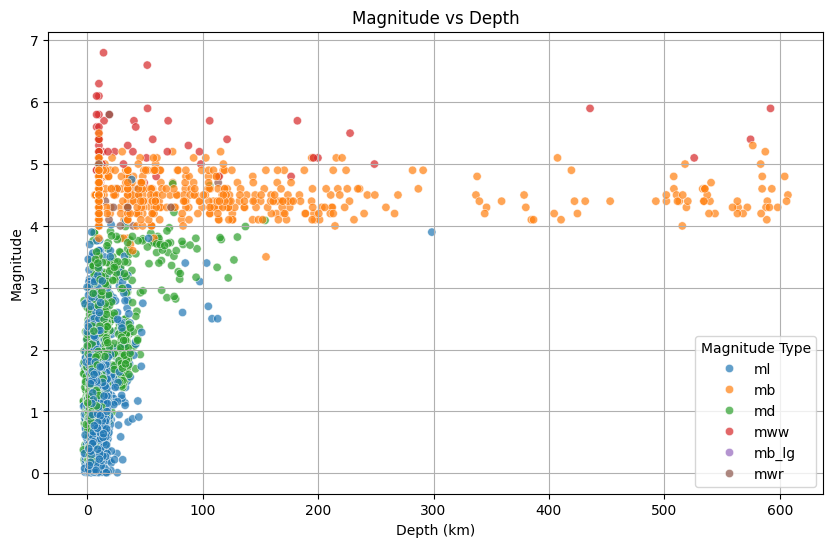

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=earthquake_df, x='depth', y='mag', hue='magType', palette='tab10', alpha=0.7)
plt.title('Magnitude vs Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.legend(title='Magnitude Type')
plt.grid()
plt.show()

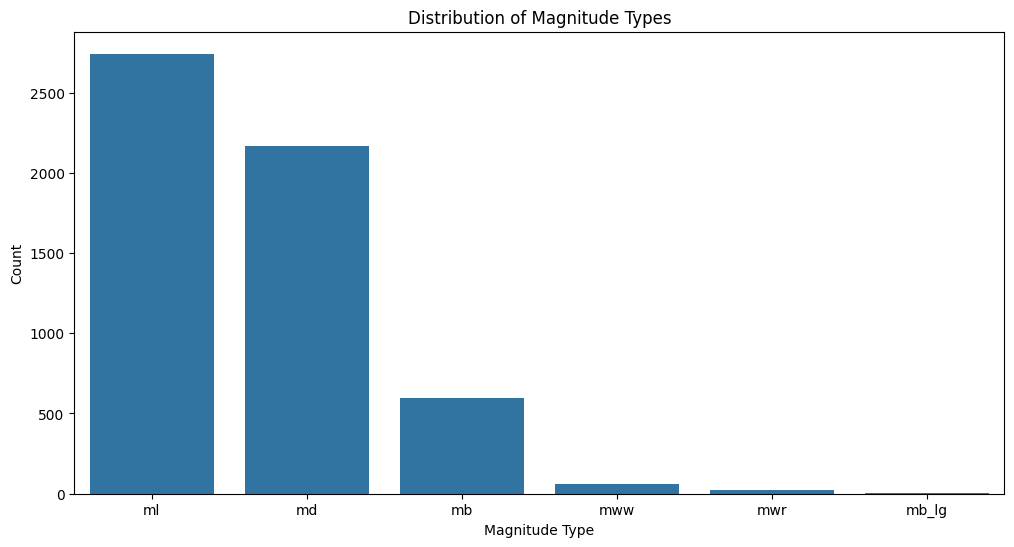

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(data=earthquake_df, x='magType', order=earthquake_df['magType'].value_counts().index)
plt.title('Distribution of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()

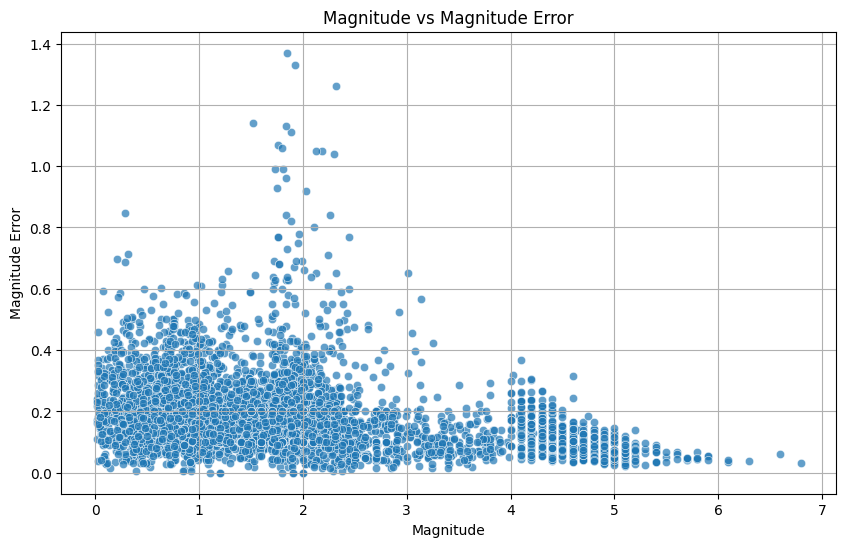

In [33]:
# Visualization for Magnitude vs Magnitude Error without 'magType'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=earthquake_df, x='mag', y='magError', alpha=0.7)
plt.title('Magnitude vs Magnitude Error')
plt.xlabel('Magnitude')
plt.ylabel('Magnitude Error')
plt.grid()
plt.show()

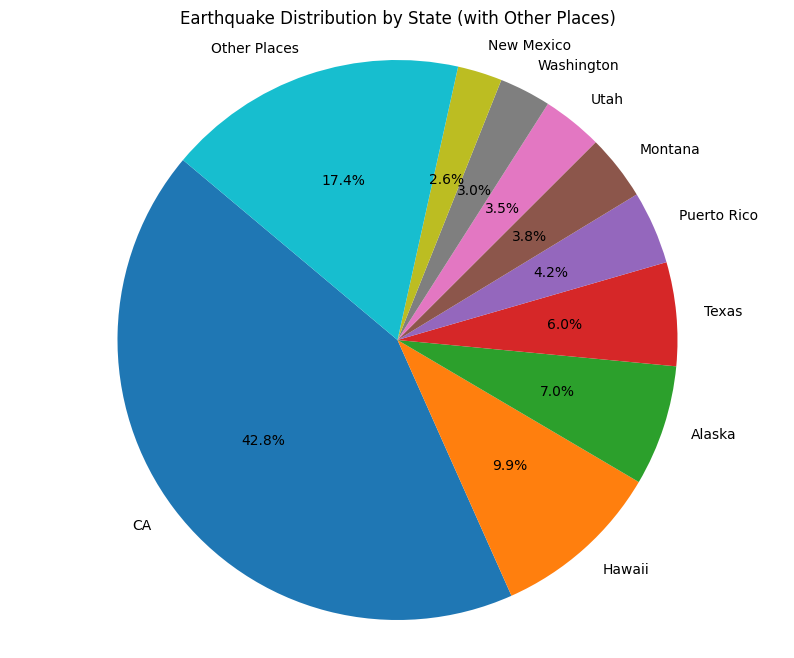

In [34]:
# Extract states from the 'place' column directly and create a pie chart with "Other States"
if 'place' in earthquake_df.columns:
    # Extract the state name without creating a new column
    states = earthquake_df['place'].str.split(',').str[-1].str.strip()

    # Count the occurrences of each unique state
    state_counts = states.value_counts()

    # Calculate percentage for each state
    total = state_counts.sum()
    state_percentages = (state_counts / total) * 100

    # Combine states below 1.7% into "Other States"
    state_counts_adjusted = state_counts[state_percentages >= 1.7]
    state_counts_adjusted['Other Places'] = state_counts[state_percentages < 1.7].sum()

    # Plot a pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(
        state_counts_adjusted.values,
        labels=state_counts_adjusted.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title('Earthquake Distribution by State (with Other Places)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("The column 'place' does not exist in the dataset.")
